<a href="https://colab.research.google.com/github/GerardoMunoz/Curso_Python/blob/main/IR_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Control

# Decoding an IR Digital Signal



## Electronic Components Assembly
1. Connect the Raspberry Pico (W) to the computer using a micro USB cable.
2. Connect a LED with its resistor to GP0.
3. Connect an IR sensor as follows:

| IR Sensor | Raspberry Pico |
|-----------|----------------|
| Vout      | GP17           |
| GND       | GND            |
| Vcc       | 3V3            |


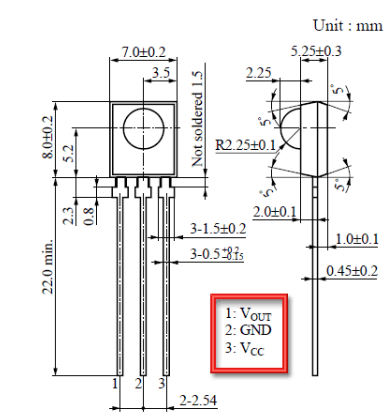


## Background

The output of the IR sensor TSSP4038 (Vcc) goes high when it receives an infrared light blinking at 38 kHz.

In an IR remote control, logic zero and logic one are represented by varying blinking durations, with the specific timings depending on the remote control model. Each key on the remote control is associated with a unique combination of logic ones and logic zeros. The goal is to decipher the representation of each digit using the specific remote control's blinking patterns.


## Code in MicroPython for Raspberry Pico (W)

The following code displays the timing of the blinking intervals and the time between two consecutive blinks.
```python
import time
import rp2
from machine import Pin

@rp2.asm_pio(set_init=rp2.PIO.OUT_LOW)
def blink():
    label('inicio')
    mov(x,invert(null))
    jmp(pin,'uno')
    label('cero')
    set(pins, 0)
    jmp(x_dec,'cero_bis')
    jmp('fin')
    label('cero_bis')
    jmp(pin,'fin')
    jmp('cero')
    label('uno')
    set(pins, 1)
    jmp(x_dec,'uno_bis')
    jmp('fin')
    label('uno_bis')
    nop()
    jmp(pin,'uno')
    label('fin')
    mov(isr,x)
    push(noblock)
    jmp('inicio')

   
sm = rp2.StateMachine(
    0,
    blink,
    freq=38000*100,
    set_base=Pin(0),
    jmp_pin= Pin(17, Pin.IN, Pin.PULL_UP)
)

sm.active(1)
while True:
    dat=sm.get()
    print(2**32-dat,end=', ')

```


## Example Scenario

When the '0' key is pressed, the following sequence is displayed:



```
896431, 9244, 4221, 647, 468, 643, 471, 649, 466, 642, 469, 646, 468, 644, 471,
 644, 469, 645, 469, 647, 1518, 645, 1520, 642, 1522, 640, 1527, 619, 1547,
  638, 1528, 641, 1520, 644, 1524, 620, 496, 645, 1522, 642, 1523, 642, 472,
  618, 1548, 641, 474, 619, 497, 618, 497, 644, 1522, 641, 473, 644, 471, 640,
  1525, 642, 470, 640, 1525, 642, 1522, 645, 1519, 643, 37904, 9218, 2069, 644,

```


After pressing the '0' key 10 times, with more than 2-second interval between each press, the following pattern is displayed:


1.   Elemento de lista
2.   Elemento de lista



```

1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619,
499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517,
645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625,
1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515,
649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167,
9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531,
585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551,
1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611,
1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558,
609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553,
37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607,
500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552,
631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527,
606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606,
499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608,
37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554,
565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557,
608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584,
582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609,
531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613,
37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578,
508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561,
601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556,
602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600,
507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601,
37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605,
503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552,
605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554,
609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607,
504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608,
37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570,
537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557,
600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554,
599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601,
502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602,
37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604,
502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553,
603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557,
595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547,
539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601,
37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602,
503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555,
602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553,
604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626,
477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603,
37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544,
563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593,
521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613,
547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520,
588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522,
38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564,
537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613,
565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588,
591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590,
536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565,
37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565,
534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614,
568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613,
566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543,
561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590,
37959, 9050, 2138, 545,

```


## Data Analysis for Pattern Discovery

The next step involves analyzing the data to uncover the underlying pattern. To begin, a variable `input_data` is defined.

In [3]:
input_data = [1227929, 9331, 4336, 532, 506, 616, 502, 639, 476, 645, 472, 619, 497, 619, 499, 620, 496, 646, 473, 620, 1545, 647, 1517, 621, 1548, 614, 1552, 649, 1517, 645, 1518, 646, 1517, 647, 1515, 640, 473, 643, 1519, 648, 1517, 649, 467, 625, 1545, 648, 466, 649, 468, 654, 459, 652, 1513, 644, 471, 649, 467, 650, 1515, 649, 469, 646, 1522, 649, 1517, 652, 1513, 649, 37859, 9176, 2062, 678, 91167, 9226, 2106, 604, 1928130, 2918, 403, 3087, 837, 1090, 4286, 578, 508, 608, 531, 585, 533, 250, 2266, 287, 702, 316, 753, 502, 560, 555, 1641, 553, 1591, 551, 1613, 581, 1588, 587, 1581, 581, 1565, 607, 1561, 610, 1557, 612, 503, 611, 1554, 612, 1555, 610, 507, 610, 1556, 610, 529, 583, 510, 609, 507, 610, 1558, 609, 510, 612, 504, 611, 1556, 611, 532, 583, 1584, 582, 1586, 580, 1586, 553, 37863, 9314, 2078, 615, 2474576, 9108, 4255, 606, 501, 606, 501, 604, 501, 607, 500, 607, 499, 606, 500, 605, 499, 606, 499, 605, 1553, 605, 1550, 604, 1552, 631, 1523, 601, 1553, 606, 1552, 603, 1551, 629, 1527, 606, 498, 628, 1527, 606, 1547, 608, 498, 603, 1551, 633, 473, 605, 502, 609, 499, 608, 1551, 606, 499, 606, 499, 605, 1550, 607, 497, 608, 1547, 603, 1551, 608, 1546, 608, 37944, 9024, 2100, 631, 2557320, 9275, 4286, 553, 563, 605, 513, 555, 564, 554, 565, 579, 538, 585, 530, 584, 532, 584, 530, 585, 1559, 608, 1557, 608, 1557, 608, 1582, 582, 1584, 578, 1586, 580, 1585, 581, 1584, 582, 533, 582, 1584, 582, 1560, 602, 537, 580, 1584, 610, 506, 582, 509, 608, 532, 583, 1560, 609, 531, 584, 532, 584, 1561, 605, 511, 606, 1582, 582, 1559, 606, 1557, 613, 37920, 9078, 2106, 602, 3068902, 9168, 4262, 604, 509, 600, 508, 602, 530, 578, 508, 602, 530, 581, 507, 603, 507, 601, 507, 629, 1533, 604, 1558, 602, 1561, 601, 1560, 605, 1558, 602, 1554, 605, 1555, 603, 1557, 603, 502, 604, 1556, 602, 1555, 602, 505, 599, 1557, 600, 506, 599, 506, 599, 504, 602, 1556, 600, 507, 598, 506, 603, 1555, 601, 506, 602, 1556, 602, 1559, 600, 1559, 601, 37981, 9026, 2143, 571, 2189940, 9187, 4260, 604, 506, 607, 503, 603, 505, 605, 503, 607, 503, 604, 505, 603, 502, 606, 501, 606, 1555, 607, 1553, 607, 1552, 605, 1554, 605, 1558, 604, 1557, 607, 1556, 603, 1556, 604, 507, 605, 1554, 609, 1555, 608, 503, 605, 1555, 609, 504, 605, 504, 608, 502, 606, 1555, 607, 504, 605, 504, 631, 1532, 608, 504, 605, 1555, 608, 1553, 609, 1552, 608, 37947, 9136, 2075, 610, 2143310, 9140, 4312, 553, 561, 570, 537, 568, 539, 570, 537, 546, 561, 577, 531, 579, 506, 603, 530, 580, 1557, 599, 1556, 601, 1557, 600, 1557, 601, 1555, 602, 1559, 599, 1557, 602, 1552, 602, 505, 602, 1554, 599, 1556, 600, 504, 600, 1557, 600, 502, 602, 501, 600, 503, 599, 1556, 601, 502, 603, 502, 598, 1557, 599, 505, 599, 1555, 599, 1556, 602, 1555, 602, 37958, 9052, 2106, 604, 2064092, 9128, 4257, 605, 506, 605, 504, 604, 503, 604, 502, 604, 504, 602, 503, 603, 505, 606, 499, 601, 1555, 604, 1553, 605, 1553, 603, 1552, 606, 1552, 602, 1777, 392, 1556, 598, 1558, 598, 506, 599, 1557, 595, 1579, 519, 590, 573, 1589, 575, 539, 551, 563, 548, 565, 548, 1615, 547, 539, 602, 508, 605, 1556, 607, 504, 606, 1557, 600, 1554, 626, 1529, 601, 37947, 8970, 2101, 631, 2465084, 9060, 4260, 603, 505, 602, 503, 599, 505, 602, 503, 599, 504, 628, 477, 601, 503, 605, 502, 599, 1556, 603, 1554, 601, 1555, 602, 1551, 602, 1553, 603, 1555, 604, 1554, 603, 1554, 601, 502, 603, 1553, 604, 1552, 604, 502, 603, 1555, 603, 502, 602, 502, 603, 502, 624, 1531, 626, 477, 602, 500, 604, 1552, 600, 503, 603, 1550, 604, 1552, 605, 1551, 603, 37955, 9046, 2073, 606, 2395319, 9063, 4345, 518, 563, 550, 589, 524, 562, 544, 563, 572, 539, 548, 587, 520, 560, 567, 539, 570, 1589, 569, 1590, 568, 1593, 521, 1692, 442, 1665, 541, 1614, 569, 1591, 564, 1591, 564, 537, 548, 1613, 547, 1612, 546, 588, 542, 1591, 572, 537, 545, 564, 569, 538, 546, 1641, 520, 588, 519, 564, 546, 1615, 544, 589, 522, 1615, 547, 1615, 568, 1615, 522, 38012, 9052, 2143, 544, 2458182, 8921, 4318, 540, 561, 564, 538, 540, 560, 564, 537, 563, 537, 564, 536, 539, 561, 541, 561, 563, 1590, 541, 1612, 541, 1613, 565, 1589, 564, 1589, 566, 1564, 565, 1614, 564, 1590, 565, 535, 543, 1588, 591, 1561, 566, 539, 586, 1590, 566, 535, 566, 535, 567, 535, 566, 1564, 590, 536, 564, 537, 565, 1590, 563, 538, 566, 1589, 541, 1611, 568, 1587, 565, 37982, 8972, 2137, 567, 1622321, 9030, 4289, 567, 535, 567, 536, 542, 560, 565, 534, 542, 535, 590, 512, 566, 558, 567, 535, 542, 1613, 566, 1590, 542, 1614, 568, 1590, 569, 1615, 542, 1590, 570, 1587, 544, 1614, 544, 561, 542, 1613, 566, 1588, 544, 559, 566, 1587, 567, 535, 545, 559, 543, 562, 543, 1614, 543, 561, 567, 538, 543, 1614, 543, 562, 565, 1591, 567, 1589, 569, 1565, 590, 37959, 9050, 2138, 545,]


Next, you can segment each key press based on the significant time gap between them. This time gap is notably larger than the intervals within each key's pattern. The question is: **What threshold value can we use to distinguish between individual key presses?**

Now, you can proceed by following the link provided below:
[Lectura de pulsos emitidos por un control remoto infrarrojo.](https://github.com/GerardoMunoz/Curso_Python/blob/main/control_remoto_0.ipynb)